In [35]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.gridspec as gridspec 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats

In [8]:
df = pd.read_csv("/home/murtaza/myGithub/Training-Machine-Learning-Models/src/input/train.csv")

In [9]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [24]:
def summarytable(df):
    print(f"Dataset Shape: {df.shape}")
    data = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = data.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [25]:
summarytable(df)

Dataset Shape: (600000, 25)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,int64,0,600000,0,1,2,19.19
1,bin_0,float64,17894,2,0,1,0,0.44
2,bin_1,float64,18003,2,0,1,1,0.69
3,bin_2,float64,17930,2,0,0,0,0.85
4,bin_3,object,18014,2,F,F,F,0.95
5,bin_4,object,18047,2,N,Y,N,1.00
6,nom_0,object,18252,3,Red,Red,Red,1.31
7,nom_1,object,18156,6,Trapezoid,Star,NaN,2.27
8,nom_2,object,18035,6,Hamster,Axolotl,Hamster,2.27
9,nom_3,object,18121,6,Russia,NaN,Canada,2.27


In [36]:
def get_target_distribution(df):
    """
    Input: Take the dataframe as input
    Output: Displays the distribution of targets 
    """
    plt.figure(figsize=(12,6))
    g = sns.countplot(x='target', data=df, color='blue')
    g.set_title('Target Distribution', fontsize=20)
    g.set_xlabel('Target Values', fontsize=15)
    g.set_ylabel('Count', fontsize=15)
    sizes = [] # Get highest values in y
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x() + p.get_width()/2,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha='center', fontsize=14)
    g.set_ylim(0, max(sizes)*1.5)
    plt.show()

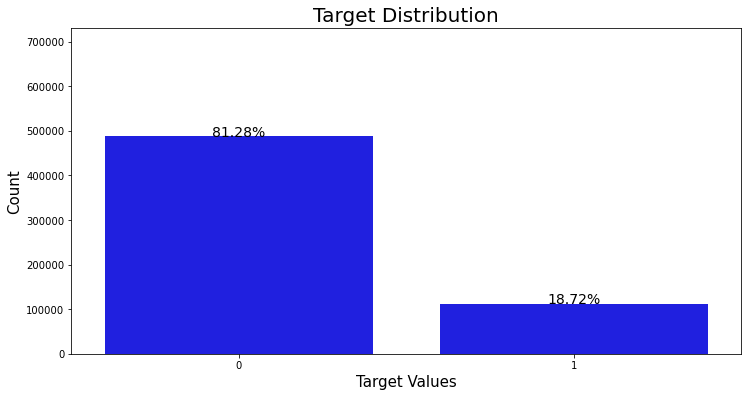

In [37]:
get_target_distribution(df)

## Plotting Binary Features

In [150]:
def get_binary_distribution_by_target(df, cols):

    """
    Input: dataframe
    Output: Displays the distribution of binary variables by target
    """
    grid = gridspec.GridSpec(3, 2) # The grid of chart
    plt.figure(figsize=(16,20)) # size of figure

    # loop to get column and the count of plots
    for n, col in enumerate(df[cols]): 
        ax = plt.subplot(grid[n]) 
        sns.countplot(x=col, data=df, hue='target', palette='hls', color='orange') 
        ax.set_ylabel('Count', fontsize=15) 
        ax.set_title(f'{col} Distribution by Target', fontsize=18) 
        ax.set_xlabel(f'{col} values', fontsize=15) 
        heights=[] 
        for p in ax.patches: 
            height = p.get_height()
            heights.append(height)
            ax.text(p.get_x()+p.get_width()/2,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center", fontsize=14) 
        ax.set_ylim(0, max(heights) * 1.15) 
        
    plt.show()

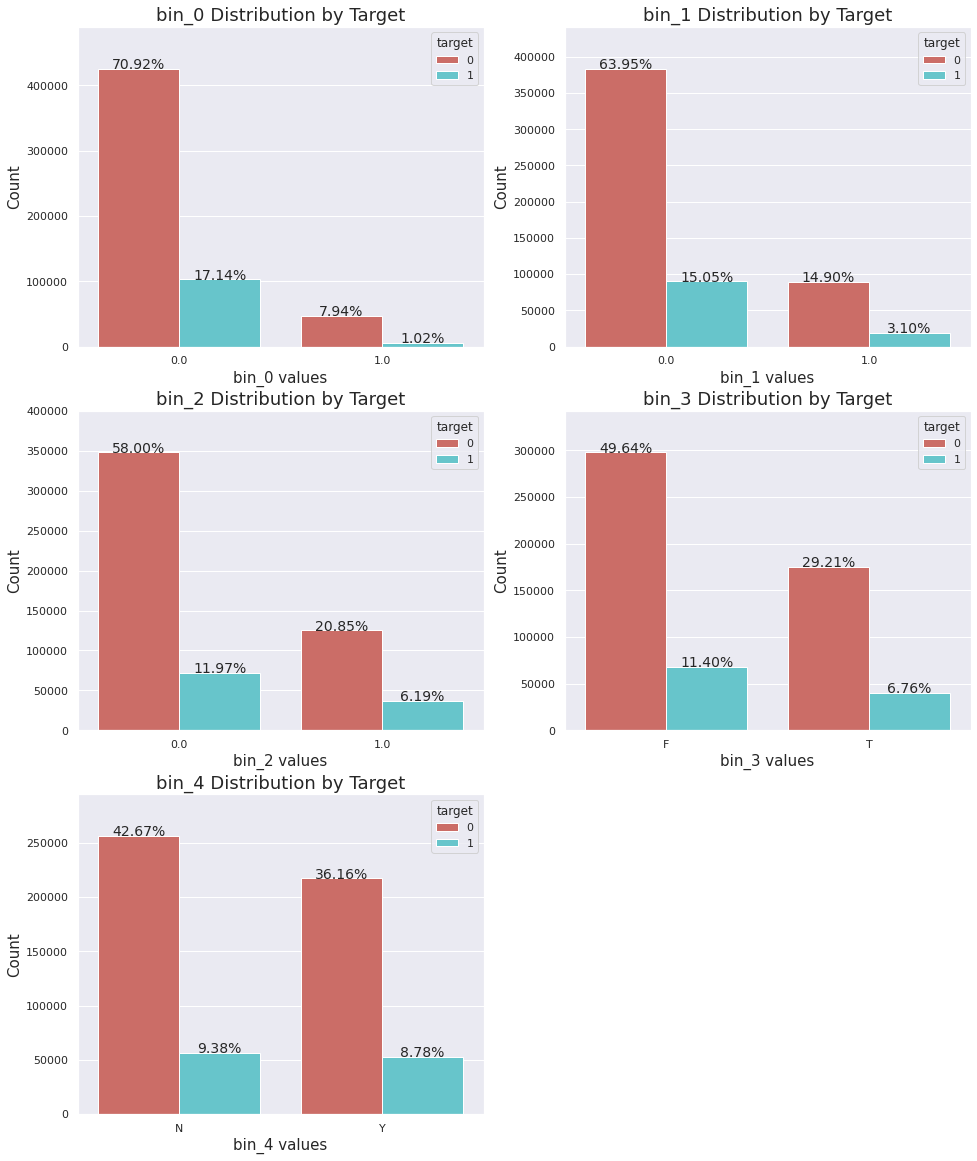

In [151]:
bin = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']
get_binary_distribution_by_target(df, bin)

## Plotting Nominal Features

In [152]:
def get_feature_distribution_by_target(df, cols):
    """
    Input: dataframe
    Output: displays the distribution of nominal variables by target
    """
    grid = gridspec.GridSpec(5, 2)
    plt.figure(figsize=(18,40))
    
    for n, col in enumerate(df[cols]):
        temp = pd.crosstab(df[col], df['target'], normalize='index')*100
        temp = temp.reset_index()
        temp.rename(columns={0:'False', 1:'True'}, inplace=True)

        ax = plt.subplot(grid[n])
        sns.countplot(x=col, data=df, order=list(temp[col].values), color='orange')
        ax.set_ylabel('Count', fontsize=15)
        ax.set_title(f'{col}_distribution_by_target', fontsize=18)
        ax.set_xlabel(f'{col}_values', fontsize=15)

        # duplicate the y axis
        sy = ax.twinx()
        sy = sns.pointplot(x=col, y='True', data=temp,
                        order=list(temp[col].values),
                        color='black', legend=False)
        sy.set_ylim(temp['True'].min()-5, temp['True'].max()*1.1)
        sy.set_ylabel('Target (% True)')
        heights = []
        for p in ax.patches:
            height = p.get_height()
            heights.append(height)
            ax.text(p.get_x()+p.get_width()/2.0,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center", fontsize=14) 
        ax.set_ylim(0, max(heights) * 1.15)
    plt.subplots_adjust(hspace=0.5, wspace=.3)
    plt.show()

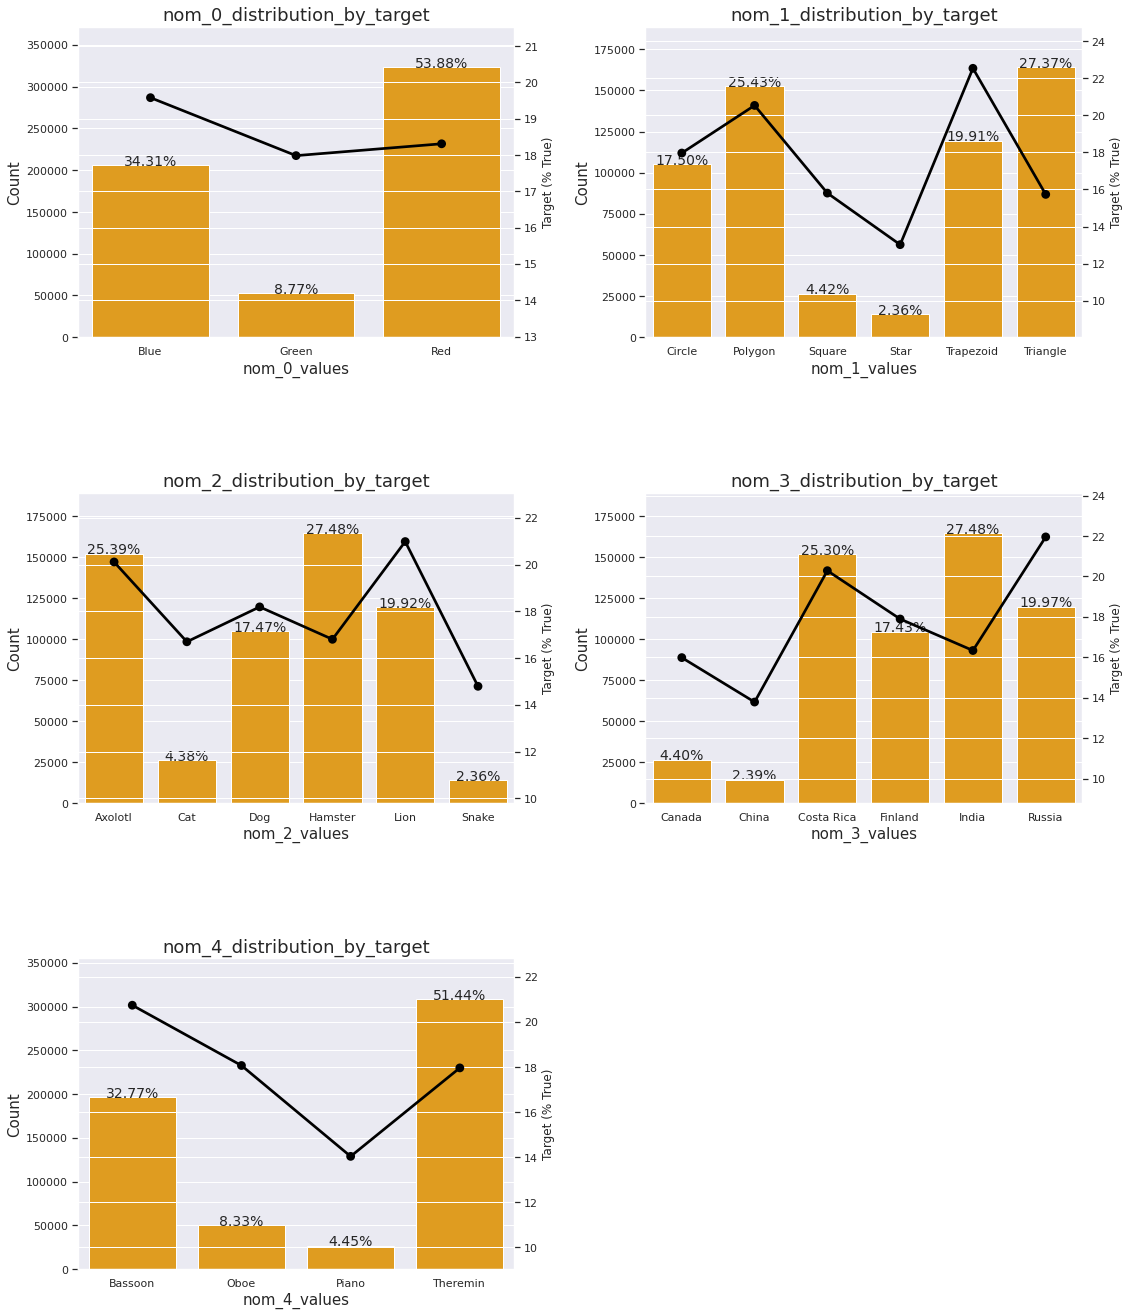

In [153]:
nom_cols = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
get_feature_distribution_by_target(df, nom_cols)


#### Description of above plot

Taking nom_2 column as an example. The count plot (represented by blue bar) gives the 
total count of each attribute in the column. Whereas, the pointplot shows, 
how many percentage of each attribute has a true value in the target.

## Plotting Ordinal Features

plotting variables only from ord_0 to ord_3 because they have low cardinality.


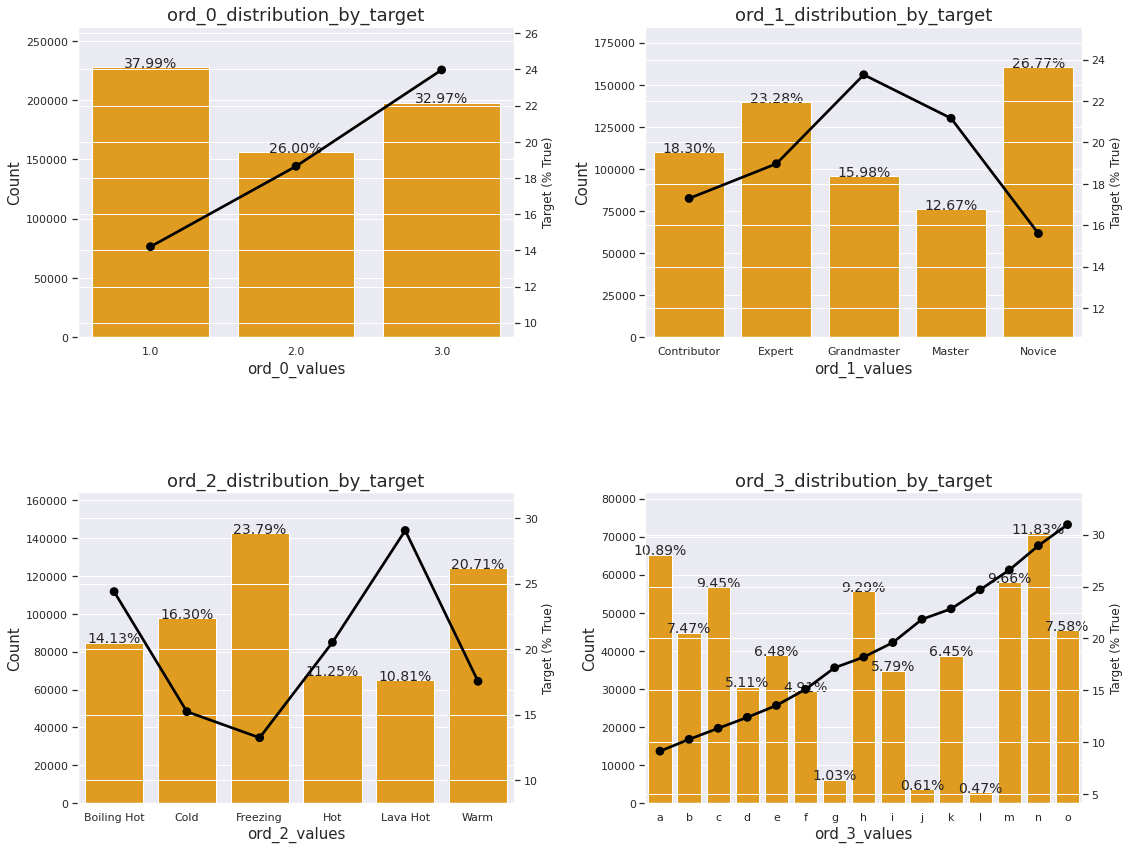

In [154]:
ord_cols = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
get_feature_distribution_by_target(df, ord_cols)

For `ord_4` and `ord_5` which have high cardinality we make some changes in the plot. 

In [144]:
df['ord_5_ot'] = 'others'
df.loc[df['ord_5'].isin(df['ord_5'].value_counts()[:25].sort_index().index), 'ord_5_ot'] = df['ord_5']

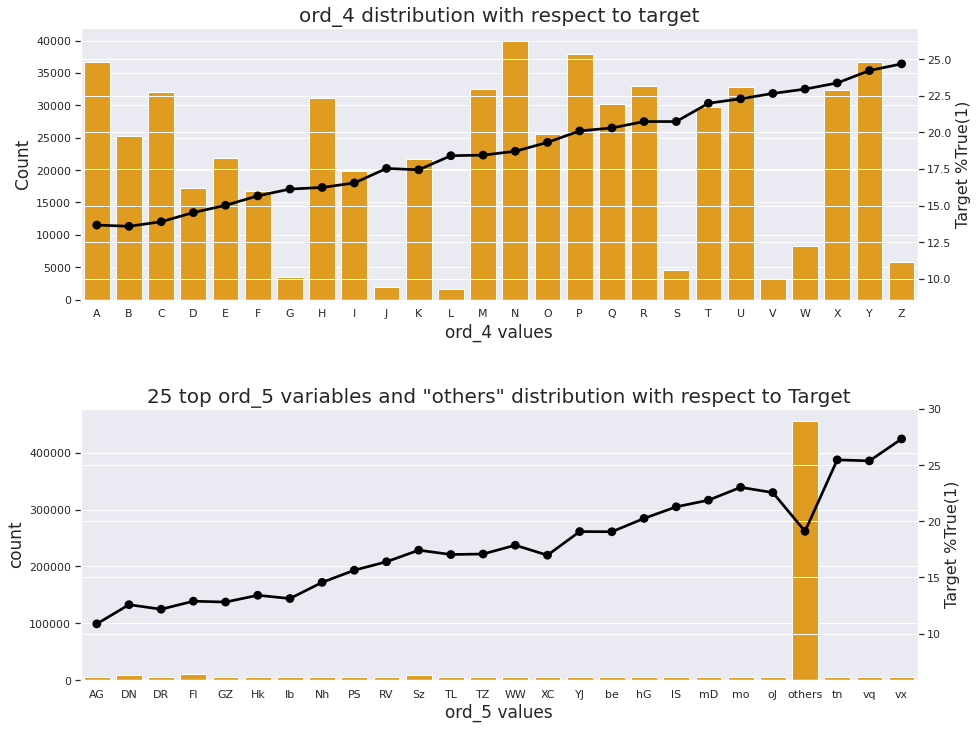

In [159]:
temp = pd.crosstab(df['ord_4'], df['target'], normalize='index') * 100
temp = temp.reset_index()
temp.rename(columns={0:'False',1:'True'}, inplace=True)
#sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,12))

plt.subplot(211)
ax = sns.countplot(x='ord_4', data=df, order=list(temp['ord_4'].values) , color='orange') 
ax.set_ylabel('Count', fontsize=17) 
ax.set_title('ord_4 distribution with respect to target', fontsize=20)
ax.set_xlabel('ord_4 values', fontsize=17) 
# duplicate te y axis
gt = ax.twinx()
gt = sns.pointplot(x='ord_4', y='True', data=temp,
                   order=list(temp['ord_4'].values),
                   color='black', legend=False)
gt.set_ylim(temp['True'].min()-5,temp['True'].max()*1.1)
gt.set_ylabel("Target %True(1)", fontsize=16)

temp = pd.crosstab(df['ord_5_ot'], df['target'], normalize='index') * 100
temp = temp.reset_index()
temp.rename(columns={0:'False',1:'True'}, inplace=True)

plt.subplot(212)
ax1 = sns.countplot(x='ord_5_ot', data=df,
                   order=list(df['ord_5_ot'].value_counts().sort_index().index) ,
                   color='orange') 
ax1.set_ylabel('count', fontsize=17) # y axis label
ax1.set_title('25 top ord_5 variables and "others" distribution with respect to Target', fontsize=20) # title label
ax1.set_xlabel('ord_5 values', fontsize=17) # x axis label
# twinX - to build a second yaxis
gt = ax1.twinx()
gt = sns.pointplot(x='ord_5_ot', y='True', data=temp,
                   order=list(df['ord_5_ot'].value_counts().sort_index().index),
                   color='black', legend=False)
gt.set_ylim(temp['True'].min()-5,temp['True'].max()*1.1)
gt.set_ylabel("Target %True(1)", fontsize=16)

plt.subplots_adjust(hspace = 0.4, wspace=.3)

plt.show()